In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from scipy.stats import kendalltau, spearmanr
import itertools
from kendall_errors import *

C:\Users\Caitlin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# kendalltau(x, y, initial_lexsort=True)
# spearmanr(x, y)[0]
# tsne = manifold.TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, 
#                      min_grad_norm=1e-07, metric='euclidean', angle=0.5)

In [3]:
n = 4
print("n = ", n)
g0=int(n/2)
# randomly assign balanced groups
groups=np.append(np.zeros(g0),np.ones(n-g0))
np.random.shuffle(groups)
print("groups",groups)
perms =[list(x) for x in itertools.permutations(range(n))]
print(len(perms))


n =  4
groups [ 1.  0.  0.  1.]
24


In [4]:
# normalized version
def kendall_eq(df):
    p = len(df[df['g']==0])*len(df[df['g']==1])
    g = np.array(df.sort_values('y', ascending=False)[['y_pred', 'g']])
    e0 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_0_eq)[1] / p
    e1 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_1_eq)[1] / p
    return e0, e1

In [5]:
def kendall_parity(df):
    df.sort_values('y_pred', ascending=False, inplace=True)
    p = len(df[df['g']==0])*len(df[df['g']==1])
    g = np.array(df.sort_values('y', ascending=False)[['y_pred', 'g']])
    e0 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_parity_0)[1] / p
    e1 = 0 if p == 0 else count_inversions(g, 0, len(g)-1, merge_parity_1)[1] / p
    if(len(df[df['g']==1]) == 0):
        #if there are no group 1 items, group 0 always preferred
        e0 = 1
    if(len(df[df['g']==0]) == 0):
        #if there are no group 0 items, group 1 always preferred
        e1 = 1
    return e0, e1

In [6]:
def kendall_cal(df):
    df.sort_values('y_pred', ascending=False, inplace=True)
    p0 = pairs(len(df)) - pairs(len(df[df['g']==1]))
    p1 = pairs(len(df)) - pairs(len(df[df['g']==0]))
    g = np.array(df.sort_values('y', ascending=False)[['y_pred', 'g']])
    e0 = 0 if p0 == 0 else count_inversions(g, 0, len(g)-1, merge_0_cal)[1] / p0
    e1 = 0 if p1 == 0 else count_inversions(g, 0, len(g)-1, merge_1_cal)[1] / p1
    return e0, e1

In [16]:
# have to initialize comparison functions with group assignments for canonical ranking
# TODO: make real class with initialization function


# TODO: there is some normalization happening in the t-sne function. 
# Either need to turn this off, or precomute the distance patrix
def rank_cal(p1,p2):
#     print(p1,p2)
    df = pd.DataFrame()
    df['y']=p1
    g1 = [groups[int(x)] for x in p1]
    df['g']=[g1[int(x)] for x in p2]
    df['y_pred']=p2
    e0,e1 = kendall_cal(df)
    return (e0,e1)
#     return abs(e0-e1)
#     if (e0 - e1) == 0.0:
#         return 0.0
#     else:
#         return 1.0

def rank_eq(p1,p2):
    df = pd.DataFrame()
    df['y']=p1
    g1 = [groups[int(x)] for x in p1]
    df['g']=[g1[int(x)] for x in p2]
    df['y_pred']=p2
    print(df)
    e0,e1 = kendall_eq(df)
    return (e0,e1)
#     return abs(e0-e1)
#     if (e0 - e1) == 0.0:
#         return 0.0
#     else:
#         return 1.0

def rank_par(p1,p2):
    df = pd.DataFrame()
    df['y']=p1
    g1 = [groups[int(x)] for x in p1]
    df['g']=[g1[int(x)] for x in p2]
    df['y_pred']=p2
    print(df)
    e0,e1 = kendall_parity(df)
    return (e0,e1)
#     return abs(e0-e1)
#     if (e0 - e1) == 0.0:
#         return 0.0
#     else:
#         return 1.0

In [17]:
# TESTING error functions
groups=[0,0,1,0,1,1]

print(rank_eq([0,1,2,3,4,5],[5,4,3,2,1,0]))
print(rank_cal([0,1,2,3,4,5],[5,4,3,2,1,0]))
print(rank_par([0,1,2,3,4,5],[5,4,3,2,1,0]))

   y  g  y_pred
0  0  1       5
1  1  1       4
2  2  0       3
3  3  1       2
4  4  0       1
5  5  0       0
(0.8888888888888888, 0.1111111111111111)
(1.0, 1.0)
   y  g  y_pred
0  0  1       5
1  1  1       4
2  2  0       3
3  3  1       2
4  4  0       1
5  5  0       0
(0.8888888888888888, 0.1111111111111111)


In [8]:
colors = [rank_par(range(len(x)),x) for x in perms]
# print(colors)

In [9]:
# tsne = manifold.TSNE(perplexity=3, metric=rank_cal)
# Y = tsne.fit_transform(perms)
# a= np.array([Y[i] for i,x in enumerate(colors) if x==0.0])
# plt.scatter(a[:,0], a[:,1])
# plt.xlim(300,-300)
# plt.ylim(300,-300)
# #     plt.scatter(Y[:,0], Y[:,1], c=colors)
# #     plt.legend(colors)
# print("perplexity ", perplexity)
# plt.show()

In [10]:
# perplexities = [3,5,7,10]
# print("metric Calibration")
# for i, perplexity in enumerate(perplexities):
#     tsne = manifold.TSNE(perplexity=perplexity, metric=rank_cal)
#     Y = tsne.fit_transform(perms)
#     plt.scatter(Y[:,0], Y[:,1], c=colors)
#     print("perplexity ", perplexity)
#     plt.show()


metric Parity
perplexity  3


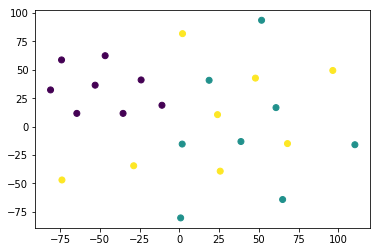

perplexity  5


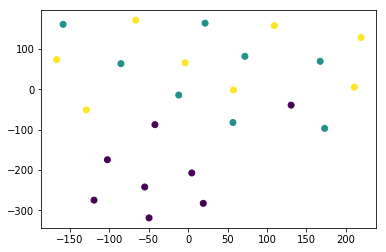

perplexity  7


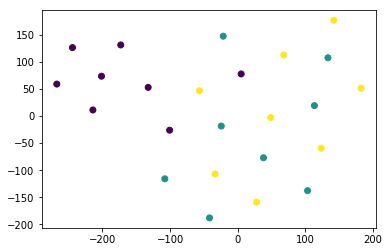

perplexity  10


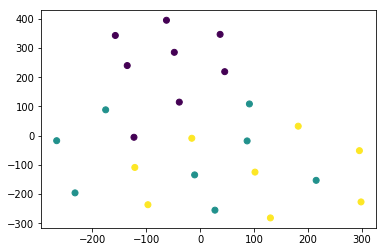

In [100]:
perplexities = [3, 5, 7, 10]
print("metric Parity")
for i, perplexity in enumerate(perplexities):
#     tsne = manifold.TSNE(perplexity=perplexity, metric='euclidean')
    tsne = manifold.TSNE(perplexity=perplexity, metric=rank_par)
    Y = tsne.fit_transform(perms)
    plt.scatter(Y[:,0], Y[:,1], c=colors)
    print("perplexity ", perplexity)
#     plt.show()
    plt.savefig("rank_par"+str(perplexity)+".png")
    plt.clf()


In [101]:
perplexities = [3,5,7,10]
for i, perplexity in enumerate(perplexities):
#     tsne = manifold.TSNE(perplexity=perplexity, metric='euclidean')
    tsne = manifold.TSNE(perplexity=perplexity, metric=rank_eq)
    Y = tsne.fit_transform(perms)
    plt.scatter(Y[:,0], Y[:,1], c=colors)
    print("perplexity ", perplexity)
#     for i,c in enumerate(colors):
#         plt.text(Y[i,0]+0.5, Y[i,1]+0.5, c, fontsize=9)

    plt.savefig("rank_eq"+str(perplexity)+".png")
    plt.clf()
#     plt.show()


perplexity  3
perplexity  5
perplexity  7
perplexity  10


In [102]:
def tau(x, y):
    return kendalltau(x,y)[0]

In [103]:
perplexities = [5,7,10]
print("metric Kendall")
for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(perplexity=perplexity, metric=tau)
    Y = tsne.fit_transform(perms)
    plt.scatter(Y[:,0], Y[:,1], c=colors)
    print("perplexity ", perplexity)
#     plt.show()
    plt.savefig("kendall"+str(perplexity)+".png")
    plt.clf()

metric Kendall
perplexity  5
perplexity  7
perplexity  10


In [ ]:
# TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric=’euclidean’, 
# init=’random’, verbose=0, random_state=None, method=’barnes_hut’, angle=0.5)

In [21]:
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)


In [ ]:


red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()

In [84]:
# 
# def rank_cal(p):
#     df = pd.DataFrame()
#     df['y']=range(len(p))
#     df['g']=[groups[x] for x in p]
#     df['y_pred']=p
#     e0,e1 = kendall_cal(df)
#     return abs(e0-e1)

# def rank_eq(p):
#     df = pd.DataFrame()
#     df['y']=range(len(p))
#     df['g']=[groups[x] for x in p]
#     df['y_pred']=p
#     e0,e1 = kendall_eq(df)
#     return abs(e0-e1)

# def rank_par(p):
#     df = pd.DataFrame()
#     df['y']=range(len(p))
#     df['g']=[groups[x] for x in p]
#     df['y_pred']=p
#     e0,e1 = kendall_parity(df)
#     return abs(e0-e1)


# # TESTING error functions
# print("n = ", n)
# g0=int(n/2)
# groups=np.append(np.zeros(g0),np.ones(n-g0))
# np.random.shuffle(groups)
# print("groups",groups)
# perms =[list(x) for x in itertools.permutations(range(n))]
# print(len(perms))

# groups=[0,0,1,0,1,1]

# print(rank_eq([5,4,3,2,1,0]))
# print(rank_par([5,4,3,2,1,0]))
# print(rank_cal([5,4,3,2,1,0]))